In [37]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho do arquivo DTA
file_path = "C:\\Users\\cinthia.correia-ext\\Downloads\\PublicDataSet_ReligiousRestrictions_2007to2016\\PublicDataSet_ReligiousRestrictions_2007to2016.dta"

# Ler o arquivo .dta
df, meta = pyreadstat.read_dta(file_path)

# Mostrar os dados
print(df)


      Nation_fk                   Region5                   Region6  \
0            13                    Europe                    Europe   
1            13                    Europe                    Europe   
2            13                    Europe                    Europe   
3            13                    Europe                    Europe   
4            13                    Europe                    Europe   
...         ...                       ...                       ...   
1971        229  Middle East-North Africa  Middle East-North Africa   
1972        237        Sub-Saharan Africa        Sub-Saharan Africa   
1973        237        Sub-Saharan Africa        Sub-Saharan Africa   
1974        237        Sub-Saharan Africa        Sub-Saharan Africa   
1975        237        Sub-Saharan Africa        Sub-Saharan Africa   

     Ctry_EditorialName  Question_Year  GRI  SHI  GRI_Q_1  GRI_Q_2  GRI_Q_3  \
0               Austria           2007  2.6  1.1      0.5     0.67  

In [38]:
# Verify availabe columms 
print(df.columns)

Index(['Nation_fk', 'Region5', 'Region6', 'Ctry_EditorialName',
       'Question_Year', 'GRI', 'SHI', 'GRI_Q_1', 'GRI_Q_2', 'GRI_Q_3',
       'GRI_Q_4', 'GRI_Q_5', 'GRI_Q_6', 'GRI_Q_7', 'GRI_Q_8', 'GRI_Q_9',
       'GRI_Q_10', 'GRI_Q_11', 'GRI_Q_11_Christianity', 'GRI_Q_11_Islam',
       'GRI_Q_11_Buddhism', 'GRI_Q_11_Hinduism', 'GRI_Q_11_Judaism',
       'GRI_Q_11_Folk_Religions', 'GRI_Q_11_Other_Religions', 'GRI_Q_12',
       'GRI_Q_13', 'GRI_Q_14', 'GRI_Q_15', 'GRI_Q_16', 'GRI_Q_16_reasons',
       'GRI_Q_17', 'GRI_Q_18', 'GRI_Q_19', 'GRI_Q_19_extent',
       'GRI_Q_19_Property_Damage', 'GRI_Q_19_Detentions',
       'GRI_Q_19_Displacements', 'GRI_Q_19_Abuse', 'GRI_Q_19_Deaths',
       'GRI_Q_20_1', 'GRI_Q_20_2', 'GRI_Q_20_3', 'GRI_Q_20_3_a',
       'GRI_Q_20_3_b', 'GRI_Q_20_3_c', 'GRI_Q_20_4', 'GRI_Q_20_5',
       'SHI_Q_1_Harassment', 'SHI_Q_1_PropertyDamage', 'SHI_Q_1_Detentions',
       'SHI_Q_1_Displacements', 'SHI_Q_1_Assaults', 'SHI_Q_1_Deaths',
       'SHI_Q_1_Extent', 'SHI_Q

In [39]:
# Show general informations
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 81 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Nation_fk                       1976 non-null   int64  
 1   Region5                         1976 non-null   object 
 2   Region6                         1976 non-null   object 
 3   Ctry_EditorialName              1976 non-null   object 
 4   Question_Year                   1976 non-null   int64  
 5   GRI                             1976 non-null   float64
 6   SHI                             1976 non-null   float64
 7   GRI_Q_1                         1976 non-null   float64
 8   GRI_Q_2                         1976 non-null   float64
 9   GRI_Q_3                         1976 non-null   float64
 10  GRI_Q_4                         1976 non-null   float64
 11  GRI_Q_5                         1976 non-null   float64
 12  GRI_Q_6                         19

In [40]:
# Statistic description
print(df.describe(include='all'))

          Nation_fk       Region5       Region6 Ctry_EditorialName  \
count   1976.000000          1976          1976               1976   
unique          NaN             5             6                198   
top             NaN  Asia-Pacific  Asia-Pacific            Austria   
freq            NaN           500           500                 10   
mean     117.875506           NaN           NaN                NaN   
std       67.531429           NaN           NaN                NaN   
min        1.000000           NaN           NaN                NaN   
25%       58.000000           NaN           NaN                NaN   
50%      117.000000           NaN           NaN                NaN   
75%      180.000000           NaN           NaN                NaN   
max      237.000000           NaN           NaN                NaN   

        Question_Year          GRI          SHI      GRI_Q_1      GRI_Q_2  \
count     1976.000000  1976.000000  1976.000000  1976.000000  1976.000000   
uniqu

In [41]:
# Cruzamento entre Nation_fk e GRI_Q_19_Abuse
cross_tab1 = pd.crosstab(df['Region6'], df['GRI_Q_19_Abuse'])

print(cross_tab1)


GRI_Q_19_Abuse            0.0  0.2  0.4  0.6  0.8  1.0
Region6                                               
Asia-Pacific              344   88   55   10    2    1
Europe                    420   24    6    0    0    0
Latin America-Caribbean   310   17    3    0    0    0
Middle East-North Africa  125   41   25    6    1    2
North America              19    0    1    0    0    0
Sub-Saharan Africa        402   50   19    3    2    0


In [42]:
# Cruzamento entre Region and Hate Speech
cross_tab2 = pd.crosstab(df['Region6'], df['GRX_22_hate_speech'])

print(cross_tab2)

GRX_22_hate_speech          0    1
Region6                           
Asia-Pacific              205  145
Europe                     50  265
Latin America-Caribbean   182   49
Middle East-North Africa   66   74
North America               7    7
Sub-Saharan Africa        261   74


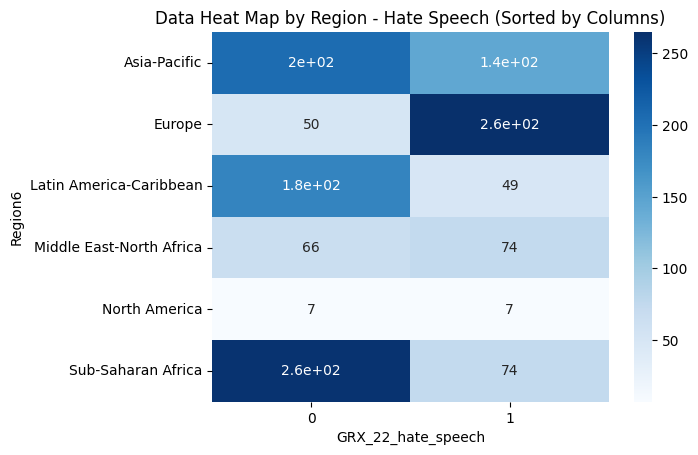

In [53]:
# Ordenar colunas (nomes das colunas) pelo total de valores (soma das colunas)
cross_tab2_sorted = cross_tab2.loc[:, cross_tab2.sum(axis=0).sort_values(ascending=False).index]

# Criar o heatmap com as colunas ordenadas
sns.heatmap(cross_tab2_sorted, annot=True, cmap='Blues')
plt.title('Data Heat Map by Region - Hate Speech (Sorted by Columns)')
plt.show()



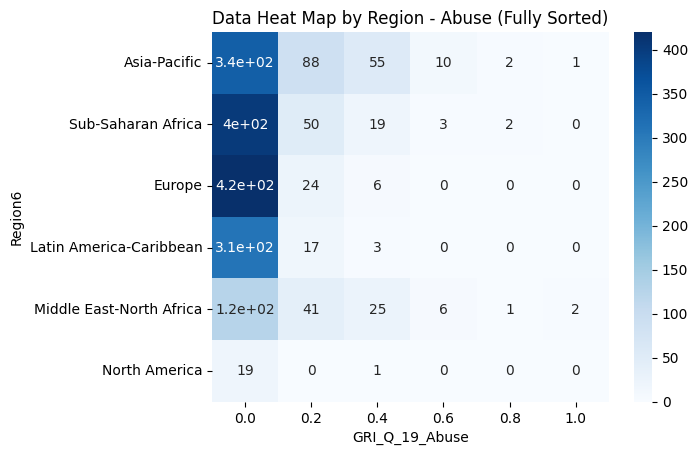

In [59]:
# Ordenar as linhas e as colunas pelo total de valores
cross_tab1_sorted = cross_tab1.loc[
    cross_tab1.sum(axis=1).sort_values(ascending=False).index,  # Ordenar as linhas
    cross_tab1.sum(axis=0).sort_values(ascending=False).index   # Ordenar as colunas
]

# Criar o heatmap com as linhas e colunas ordenadas
sns.heatmap(cross_tab1_sorted, annot=True, cmap='Blues')
plt.title('Data Heat Map by Region - Abuse (Fully Sorted)')
plt.show()


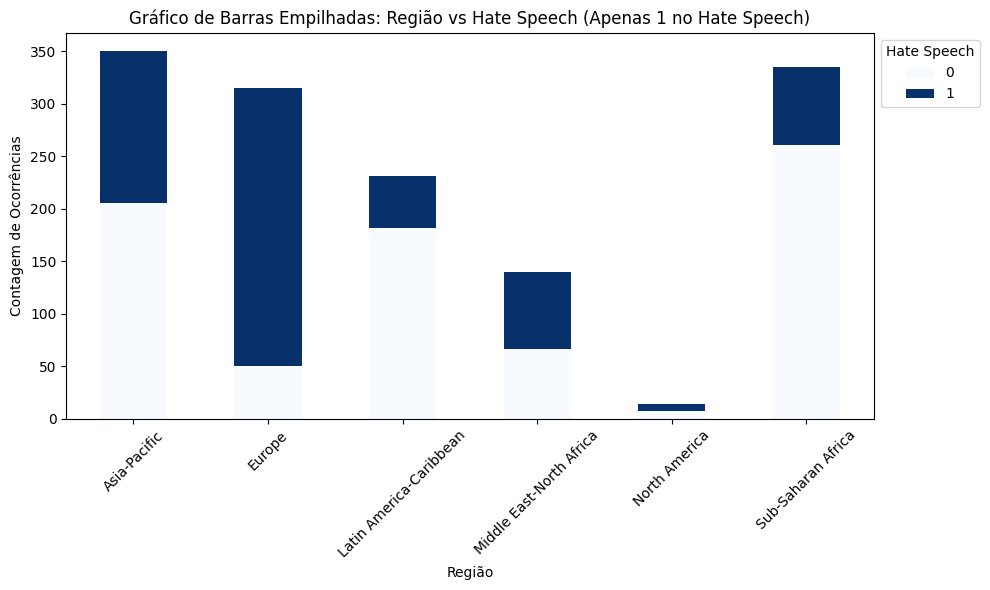

In [65]:
# Filtrar o DataFrame para desconsiderar as ocorrências com valor 0
cross_tab2_filtered = cross_tab2[cross_tab2[1] > 0]  # Considerando apenas os valores onde 'GRX_22_hate_speech' == 1

# Criar o gráfico de barras empilhadas
cross_tab2_filtered.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Blues')

# Ajustar o título e rótulos
plt.title('Gráfico de Barras Empilhadas: Região vs Hate Speech (Apenas 1 no Hate Speech)')
plt.xlabel('Região')
plt.ylabel('Contagem de Ocorrências')
plt.xticks(rotation=45)  # Girar as etiquetas do eixo x, se necessário
plt.legend(title='Hate Speech', bbox_to_anchor=(1, 1), loc='upper left')

# Exibir o gráfico
plt.tight_layout()
plt.show()


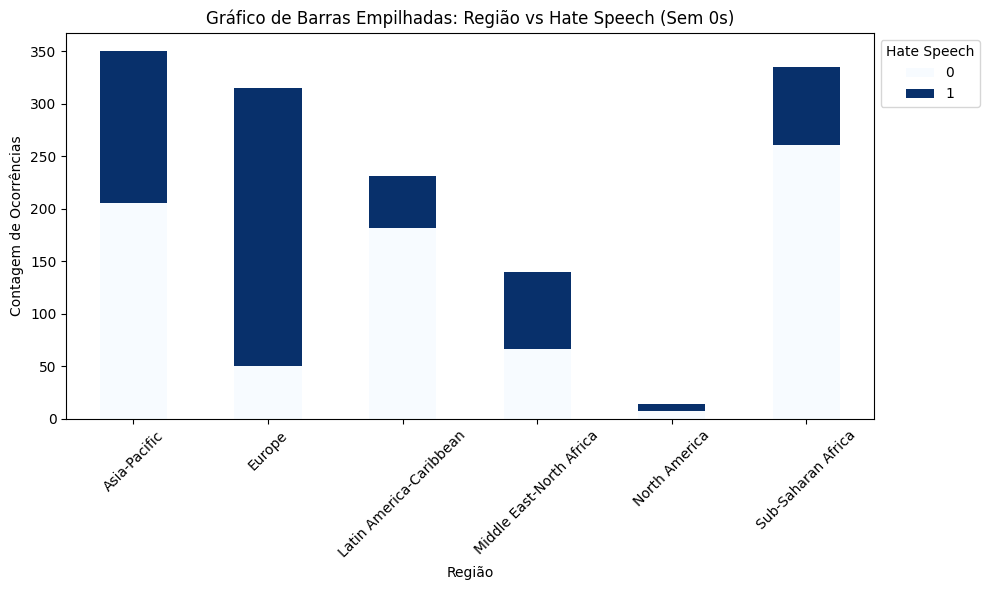

In [68]:
# Ou se quiser apenas excluir os zeros:
cross_tab2_filtered = cross_tab2.loc[:, cross_tab2.sum(axis=0) > 0]  # Exclui as colunas com soma 0

# Gerar o gráfico
cross_tab2_filtered.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Blues')
plt.title('Gráfico de Barras Empilhadas: Região vs Hate Speech (Sem 0s)')
plt.xlabel('Região')
plt.ylabel('Contagem de Ocorrências')
plt.xticks(rotation=45)  # Girar as etiquetas do eixo x, se necessário
plt.legend(title='Hate Speech', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()
